# Data Exploration of COVID-19
14 March 2020

Cecilia García López de Munain

## Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pickle

## Parameters

In [5]:
sys.path.append('./')

In [6]:
PATH_ROOT_INPUT_DATA = 'data\\input'
INPUT_DATA_NAME = 'COVID-19-geographic-disbtribution-worldwide-2020-03-14_1.xls'

PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME = 'covid_19_data_cum'

## Import Data

In [7]:
covid19_data = pd.read_excel(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_NAME))

In [8]:
covid19_data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [9]:
covid19_data.dtypes

DateRep         datetime64[ns]
CountryExp              object
NewConfCases             int64
NewDeaths                int64
GeoId                   object
Gaul1Nuts1              object
EU                      object
dtype: object

In [10]:
covid19_data.shape

(5001, 7)

In [11]:
# Checking for nulls
covid19_data.isnull().sum()

DateRep            0
CountryExp         0
NewConfCases       0
NewDeaths          0
GeoId              0
Gaul1Nuts1      4509
EU                 0
dtype: int64

In [12]:
# Don't know what this feature is so it doesn't matter for now
covid19_data[~covid19_data.Gaul1Nuts1.isnull()].head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
887,2020-03-10,Cases on an international conveyance Japan,-9,1,JPG11668,JPG11668,0
888,2020-03-02,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0
889,2020-03-01,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0
890,2020-02-29,Cases on an international conveyance Japan,0,2,JPG11668,JPG11668,0
891,2020-02-28,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0


## Prepare Data

In [13]:
# Set datetime index
covid19_data.set_index('DateRep', inplace=True)

In [14]:
covid19_data.head()

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
DateRep,,,,,,
2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [15]:
covid19_data.sort_index(inplace=True)

In [16]:
# Group by country
groupcols = ['CountryExp']

In [17]:
# Create cumulative features
covid19_data['NewConfCases_cum'] = covid19_data.groupby(groupcols)['NewConfCases'].cumsum()
covid19_data['NewDeaths_cum'] = covid19_data.groupby(groupcols)['NewDeaths'].cumsum()

In [18]:
covid19_data.CountryExp.unique()[:2]

array(['Vietnam', 'Sri Lanka'], dtype=object)

In [19]:
# Checks
covid19_data[covid19_data['CountryExp'].isin(['Afghanistan', 'Albania'])].tail(10)

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA,1,0
2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA,1,0
2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA,4,0
2020-03-09,Albania,2,0,AL,NaN,EU Candidate,2,0
2020-03-10,Albania,4,0,AL,NaN,EU Candidate,6,0
2020-03-11,Albania,4,0,AL,NaN,EU Candidate,10,0
2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA,7,0
2020-03-12,Albania,1,1,AL,NaN,EU Candidate,11,1
2020-03-13,Albania,12,0,AL,NaN,EU Candidate,23,1


## Plot exploration

### Plot cases confirmed by date

In [20]:
covid19_data_bydate = covid19_data.groupby(covid19_data.index)['NewConfCases'].sum()

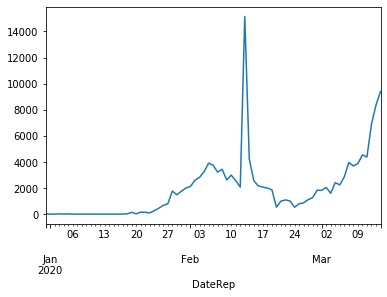

In [21]:
covid19_data_bydate.plot()

In [22]:
# Huge peak in February
covid19_data[covid19_data['NewConfCases'] >= 12000]

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2020-02-13,China,15141,254,CN,NaN,Non-EU/EEA,59865,1368


In [23]:
covid19_data[covid19_data.index == '2020-02-13'].sort_values('NewConfCases', ascending=False).head()

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2020-02-13,China,15141,254,CN,NaN,Non-EU/EEA,59865,1368
2020-02-13,Japan,4,1,JP,NaN,Non-EU/EEA,29,1
2020-02-13,Singapore,3,0,SG,NaN,Non-EU/EEA,50,0
2020-02-13,Vietnam,1,0,VN,NaN,Non-EU/EEA,16,0
2020-02-13,United States of America,1,0,US,NaN,Non-EU/EEA,14,0


In [24]:
# Because China has a different scale I'm separating it
covid19_data_china = covid19_data[covid19_data['CountryExp'] == 'China']
covid19_data_nonchina = covid19_data[covid19_data['CountryExp'] != 'China']

#### China 

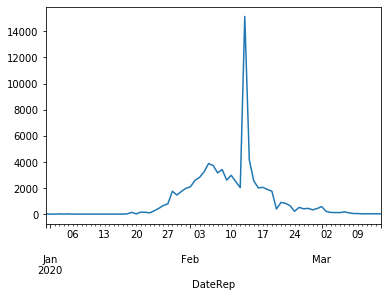

In [25]:
covid19_data_bydate_china = covid19_data_china.groupby(covid19_data_china.index)['NewConfCases'].sum()
covid19_data_bydate_china.plot()

#### Non China

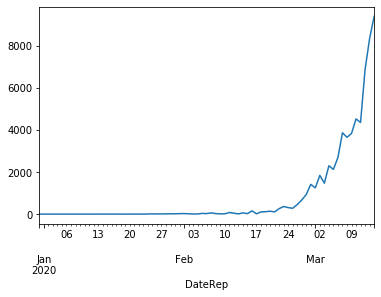

In [26]:
covid19_data_bydate_nonchina = covid19_data_nonchina.groupby(covid19_data_nonchina.index)['NewConfCases'].sum()
covid19_data_bydate_nonchina.plot()

While China seems to have passed the worst phase of the disease, the rest of the countries seem to be entering it

#### Countries worst infected

In [61]:
countries_worst = covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(5).index
covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(5)

CountryExp
Italy          17660
Iran           11364
South Korea     8086
Spain           4231
France          3661
Name: NewConfCases, dtype: int64

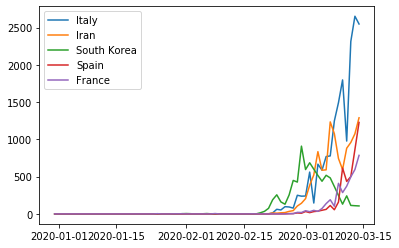

In [62]:
for country in countries_worst: 
    data = covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country].index)['NewConfCases'].sum()
    plt.plot(data, label=country)
plt.legend()

South Korea seems to be handling it different.

## Contagion trend evolution analysis

### Plot cumulative features

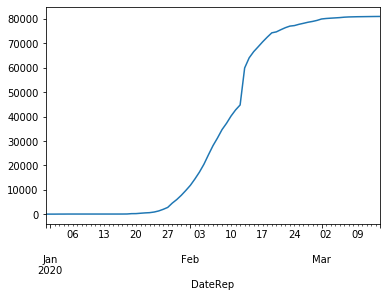

In [31]:
country_filter = 'China'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()

China is entering a stationary phase

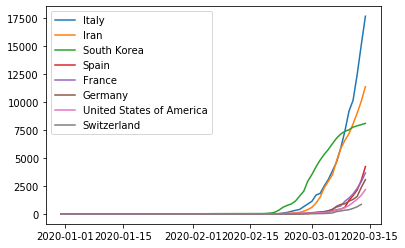

In [49]:
for country in countries_worst: 
    plt.plot(covid19_data[covid19_data['CountryExp'] == country]['NewConfCases_cum'], label=country)
plt.legend()

Other countries (non China) seem to be still raising. South Korea has a different behaviour - ? 

# Export

In [32]:
with open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME), 'wb') as f:
    pickle.dump(covid19_data, f)